In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

import warnings
warnings.filterwarnings('ignore')

In [2]:
base = pd.read_excel('data/ID있는버전.xlsx')
base['면적당매매가'] = base['거래금액(만원)'] / base['전용면적(㎡)']
base['저층여부'] = np.where(base['층']<5, '저층', '고층')
del base['계약일']
base.head(5)

,ID,시군구,단지명,전용면적(㎡),계약년월,거래금액(만원),층,건축년도,도로명,거래유형,면적당매매가,저층여부
0,서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,80,201801,130000,4,1987,언주로 3,-,1625.000000,저층
1,서울특별시 동작구 신대방동 롯데관악타워 150,서울특별시 동작구 신대방동,롯데관악타워,150,201801,74000,27,1996,보라매로5길 51,-,493.333333,고층
2,서울특별시 동작구 신대방동 경남교수 80,서울특별시 동작구 신대방동,경남교수,80,201801,65000,17,2001,여의대방로10길 14,-,812.500000,고층
3,서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 80,서울특별시 동작구 상도동,힐스테이트 상도 프레스티지,80,201801,85800,15,2013,상도로 346-2,-,1072.500000,고층
4,서울특별시 동작구 상도동 힐스테이트 상도 프레스티지 120,서울특별시 동작구 상도동,힐스테이트 상도 프레스티지,120,201801,104500,12,2013,상도로 346-2,-,870.833333,고층


In [4]:
base['계약년월'] = pd.to_datetime(base['계약년월'], format='%Y%m')
base['분기'], base['년도'] = (base['계약년월'].dt.quarter, base['계약년월'].dt.year)
base['분기'] = base[['년도','분기']].apply(lambda row:'/'.join(row.values.astype(str)), axis=1)
del base['년도']
table1 = pd.pivot_table(base, values=['거래금액(만원)'], index=['분기'], columns=['ID'], aggfunc=np.mean)
table2 = pd.pivot_table(base, values=['전용면적(㎡)'], index=['분기'], columns=['ID'], aggfunc=np.mean)
table3 = pd.pivot_table(base, values=['건축년도'], index=['분기'], columns=['ID'], aggfunc=np.mean)
check_null1 = table1.isna().sum() / 18
check_null2 = table2.isna().sum() / 18
check_null3 = table3.isna().sum() / 18
check_null1[check_null1 >= 0.5]
check_null2[check_null2 >= 0.5]
check_null3[check_null3 >= 0.5]
remove_cols1 = check_null1[check_null1 >= 0.5].keys()
remove_cols2 = check_null2[check_null2 >= 0.5].keys()
remove_cols3 = check_null3[check_null3 >= 0.5].keys()
table1 = table1.drop(remove_cols1, axis=1)
table2 = table2.drop(remove_cols2, axis=1)
table3 = table3.drop(remove_cols3, axis=1)
table1.fillna(method='ffill', inplace=True)
table1.fillna(method='bfill', inplace=True)
table2.fillna(method='ffill', inplace=True)
table2.fillna(method='bfill', inplace=True)
table3.fillna(method='ffill', inplace=True)
table3.fillna(method='bfill', inplace=True)
data1 = table1.transpose()
data2 = table2.transpose()
data3 = table3.transpose()
money = data1.droplevel(axis=0, level=0)
width = data2.droplevel(axis=0, level=0)
year = data3.droplevel(axis=0, level=0)
data = pd.concat([money,width,year], axis=1)
data = data.round(1)
data.head(5)

분기,2018/1,2018/2,2018/3,2018/4,2019/1,2019/2,2019/3,2019/4,2020/1,2020/2,...,2020/1,2020/2,2020/3,2020/4,2021/1,2021/2,2021/3,2021/4,2022/1,2022/2
ID,,,,,,,,,,,,,,,,,,,,,
서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,129125.0,145000.0,160000.0,160000.0,160000.0,141000.0,154500.0,154500.0,154500.0,157583.3,...,1987.0,1987.0,1987.0,1987.0,1987.0,1987.0,1987.0,1987.0,1987.0,1987.0
서울특별시 강남구 개포동 개포주공1단지 40,145736.8,162587.5,167687.5,150000.0,142500.0,157539.5,187208.3,193705.9,182000.0,180000.0,...,1982.0,1982.0,1982.0,1982.0,1982.0,1982.0,1982.0,1982.0,1982.0,1982.0
서울특별시 강남구 개포동 개포주공5단지 60,136666.7,129500.0,125000.0,125000.0,134500.0,142000.0,159500.0,166000.0,173500.0,167500.0,...,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0
서울특별시 강남구 개포동 개포주공5단지 80,177416.7,177416.7,177416.7,141000.0,176000.0,179166.7,194666.7,194666.7,198000.0,186000.0,...,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0
서울특별시 강남구 개포동 개포주공6단지 50,125900.0,128000.0,118500.0,118500.0,118000.0,118000.0,148250.0,161500.0,157750.0,148000.0,...,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0


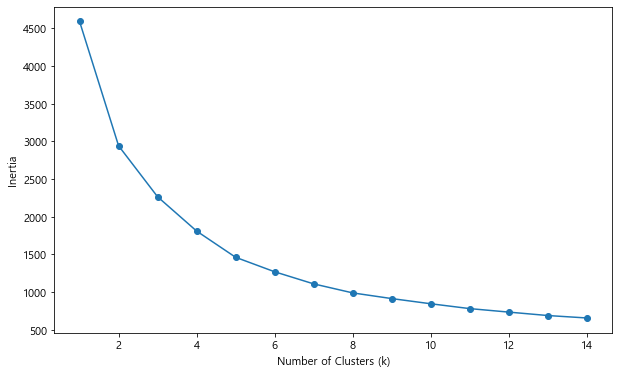

In [5]:
mm = MinMaxScaler()
mm_scaled = mm.fit_transform(data)
samples = pd.DataFrame(mm_scaled)

# 최적의 k값 찾기-배껴온 코드
num_clusters = list(range(1, 15))	# K는 1 ~ 8사이의 정수입니다
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(samples)
    inertias.append(model.inertia_)
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=6, random_state=0)
clusters = kmeans.fit(mm_scaled)

data['cluster'] = clusters.labels_
data.head(5)

분기,2018/1,2018/2,2018/3,2018/4,2019/1,2019/2,2019/3,2019/4,2020/1,2020/2,...,2020/2,2020/3,2020/4,2021/1,2021/2,2021/3,2021/4,2022/1,2022/2,cluster
ID,,,,,,,,,,,,,,,,,,,,,
서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,129125.0,145000.0,160000.0,160000.0,160000.0,141000.0,154500.0,154500.0,154500.0,157583.3,...,1987.0,1987.0,1987.0,1987.0,1987.0,1987.0,1987.0,1987.0,1987.0,1
서울특별시 강남구 개포동 개포주공1단지 40,145736.8,162587.5,167687.5,150000.0,142500.0,157539.5,187208.3,193705.9,182000.0,180000.0,...,1982.0,1982.0,1982.0,1982.0,1982.0,1982.0,1982.0,1982.0,1982.0,1
서울특별시 강남구 개포동 개포주공5단지 60,136666.7,129500.0,125000.0,125000.0,134500.0,142000.0,159500.0,166000.0,173500.0,167500.0,...,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1
서울특별시 강남구 개포동 개포주공5단지 80,177416.7,177416.7,177416.7,141000.0,176000.0,179166.7,194666.7,194666.7,198000.0,186000.0,...,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,4
서울특별시 강남구 개포동 개포주공6단지 50,125900.0,128000.0,118500.0,118500.0,118000.0,118000.0,148250.0,161500.0,157750.0,148000.0,...,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1983.0,1


In [9]:
X = mm_scaled.copy()
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[ 1.07171039,  0.25406135],
       [ 1.41322555, -0.37189131],
       [ 1.36415594, -0.08315218],
       ...,
       [ 0.17921824, -0.59522776],
       [ 0.18770012, -0.41665996],
       [ 0.21417724, -0.06754078]])

In [11]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = data['cluster'].values
pca_df.head()

,0,1,cluster
0,1.071710,0.254061,1
1,1.413226,-0.371891,1
2,1.364156,-0.083152,1
3,1.408931,0.393323,4
4,1.343748,-0.297196,1


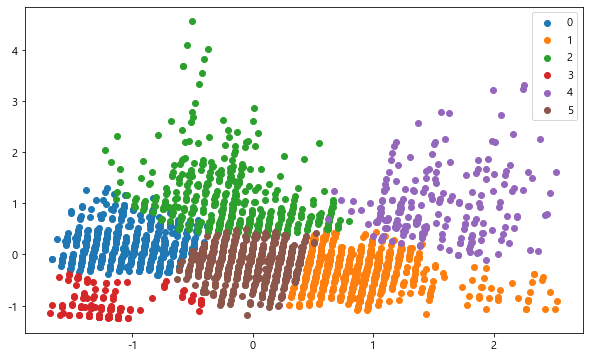

In [12]:
for i in sorted(pca_df['cluster'].unique()):
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_df['cluster'].unique()));